In [34]:
## Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [68]:
## Load the dataset
df=pd.read_csv("Mall_Customers.csv")

In [36]:
##Check info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
##missing values in the dataset
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [38]:
##drop the "customer id " and "Gender" column
df.drop(['CustomerID','Gender'], axis=1,inplace=True)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [40]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


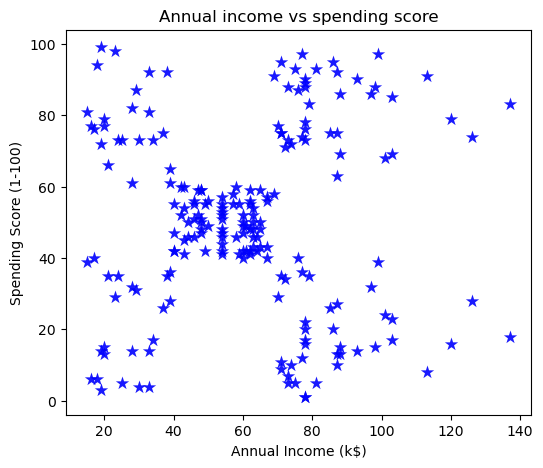

In [41]:
# EDA
## Annual income vs spending score using scatter plot
plt.figure(figsize=(6,5))
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],color='blue',edgecolor='black',alpha=0.9,linewidths=0.01,marker='*',s = 100)
plt.title("Annual income vs spending score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

#alpha is the darkness of the circles inside data
#marker is the shape of the data inside(*,round,triangle)
#S is the size of  the inside data

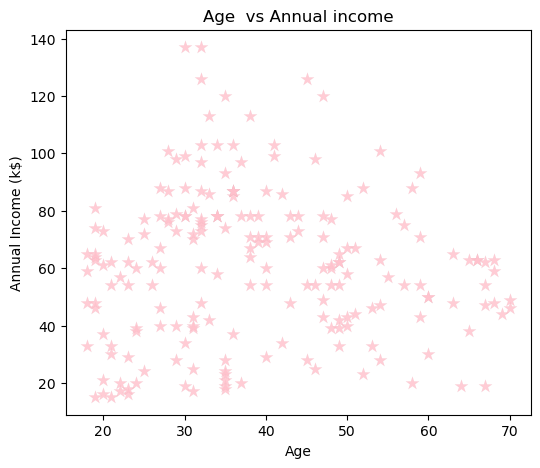

In [42]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=df['Age'],y=df['Annual Income (k$)'],color='Pink',edgecolor='black',alpha=0.8,linewidths=0.01,marker='*',s = 100)
plt.title("Age  vs Annual income")
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

In [43]:
#Feature Engineering 

In [44]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scale_data=scaler.fit_transform(df) 
scale_data                                                                                                                                                                         

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [45]:
df.columns


Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [47]:
#Convert scaled_data array into  dataframe
df=pd.DataFrame(scale_data,columns=df.columns)
df

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [48]:
#train the model
from sklearn.cluster import KMeans

#load the model
model=KMeans(n_clusters=4,random_state=42)

#train the model
model.fit(df)

#Display the model
model.labels_

c:\Users\Shreya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 1, 3, 1, 3, 1, 0, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [49]:
df['Cluster']=model.labels_

In [50]:
df.head

<bound method NDFrame.head of           Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   -1.424569           -1.738999               -0.434801        2
1   -1.281035           -1.738999                1.195704        2
2   -1.352802           -1.700830               -1.715913        2
3   -1.137502           -1.700830                1.040418        2
4   -0.563369           -1.662660               -0.395980        2
..        ...                 ...                     ...      ...
195 -0.276302            2.268791                1.118061        1
196  0.441365            2.497807               -0.861839        3
197 -0.491602            2.497807                0.923953        1
198 -0.491602            2.917671               -1.250054        3
199 -0.635135            2.917671                1.273347        1

[200 rows x 4 columns]>

In [52]:
#value counts of the cluster column
df['Cluster'].value_counts

<bound method IndexOpsMixin.value_counts of 0      2
1      2
2      2
3      2
4      2
      ..
195    1
196    3
197    1
198    3
199    1
Name: Cluster, Length: 200, dtype: int32>

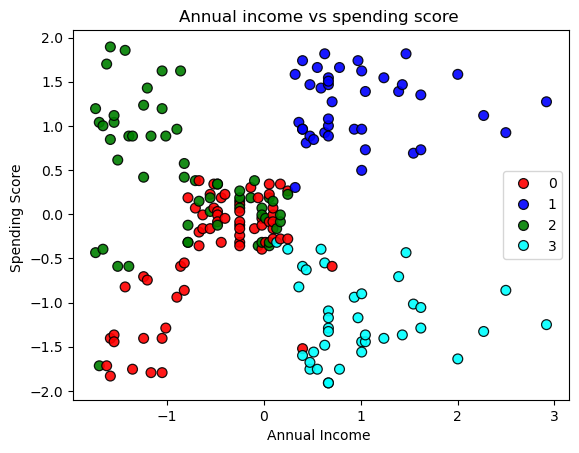

In [56]:
colours=['red','blue','green','cyan']
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,alpha=0.9,palette=colours,linewidths=0.9,
    edgecolors='black',s=50
)

plt.title("Annual income vs spending score ")
plt.xlabel('Annual Income ')
plt.ylabel('Spending Score ')
plt.legend()
plt.show()

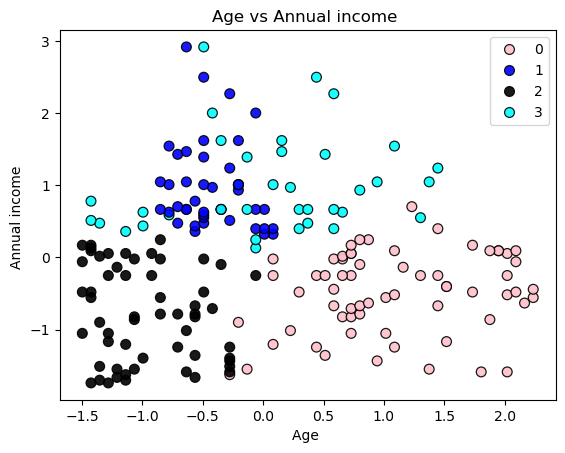

In [60]:
colours=['pink','blue','black','cyan']
sns.scatterplot(
    x='Age',
    y='Annual Income (k$)',
    hue='Cluster',
    data=df,alpha=0.9,palette=colours,linewidths=0.9,
    edgecolors='black',s=50
)

plt.title("Age vs Annual income ")
plt.xlabel('Age ')
plt.ylabel('Annual income ')
plt.legend()
plt.show()

In [61]:
#Divide the data into features and target x and y
X = df[['Age', 'Annual Income (k$)']]

# Target
y = df['Cluster']

In [62]:
#train and split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42
)

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

#  Train the model
rf_model.fit(X_train, y_train)

#  Predict on test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.85


c:\Users\Shreya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Shreya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Shreya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Shreya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

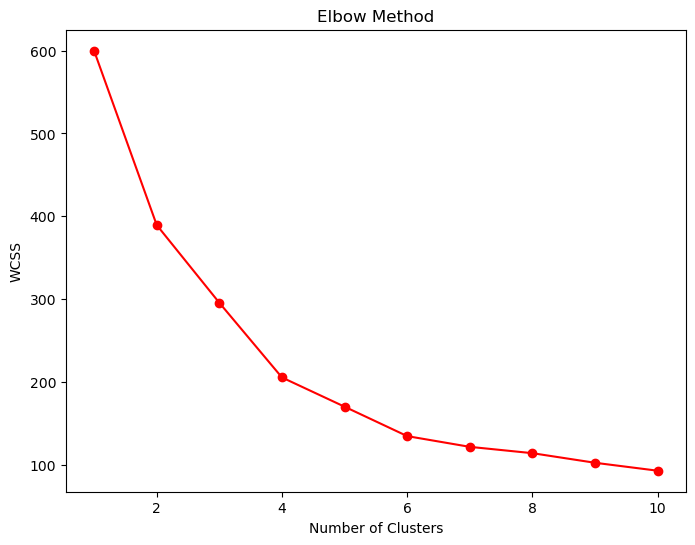

In [ ]:
##Check the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df.drop("Cluster", axis=1))
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker="o", color="red")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [65]:
##Save the models
import joblib
joblib.dump(model,'random_forest_model.pkl')

['random_forest_model.pkl']

In [66]:
# save the dataset 
df.to_csv('clustered_data.csv', index=False)

In [67]:
#save the model
joblib.dump(model,'kmeans_model.pkl')

['kmeans_model.pkl']